In [1]:
url = "dm.csv"
import pandas as pd
import numpy as np
dm = pd.read_csv(url)
dm.head(2)

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127


In [2]:
#Categorical Example
def get_good(x):
    if x>dm['AmountSpent'].mean():
        return 1
    else:
        return 0

In [3]:
dm['Target'] = dm['AmountSpent'].map(get_good)

In [4]:
dm.head(2)

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id,Target
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247,0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127,1


In [5]:
dm_rel = dm.drop(['AmountSpent','Cust_Id'],axis=1)

In [6]:
dm_rel.head(2)

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,Target
0,Old,Female,Own,Single,Far,47500,0,High,6,0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1


In [7]:
dm_rel.isnull().sum()

Age           0
Gender        0
OwnHome       0
Married       0
Location      0
Salary        0
Children      0
History     303
Catalogs      0
Target        0
dtype: int64

In [8]:
dm_rel['History']=dm_rel['History'].fillna("New_Cust")

In [9]:
dm_rel.isnull().sum()

Age         0
Gender      0
OwnHome     0
Married     0
Location    0
Salary      0
Children    0
History     0
Catalogs    0
Target      0
dtype: int64

In [10]:
dm_rel = pd.get_dummies(dm_rel)

In [11]:
dm_rel.head(4)

,Salary,Children,Catalogs,Target,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium,History_New_Cust
0,47500,0,6,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0
1,63600,0,6,1,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0
2,13500,0,18,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0
3,85600,1,18,1,1,0,0,0,1,1,0,1,0,1,0,1,0,0,0


In [12]:
train = dm_rel.sample(frac=0.7,random_state=42)
test = dm_rel.drop(train.index)

In [13]:
X_train = train.drop('Target',axis=1)
y_train = train['Target']
X_test = test.drop('Target',axis=1)
y_test = test['Target']

In [14]:
import sklearn.tree as tree

In [47]:
mod1 = tree.DecisionTreeClassifier(criterion = 'gini')

In [48]:
mod1 = mod1.fit(X_train, y_train)

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

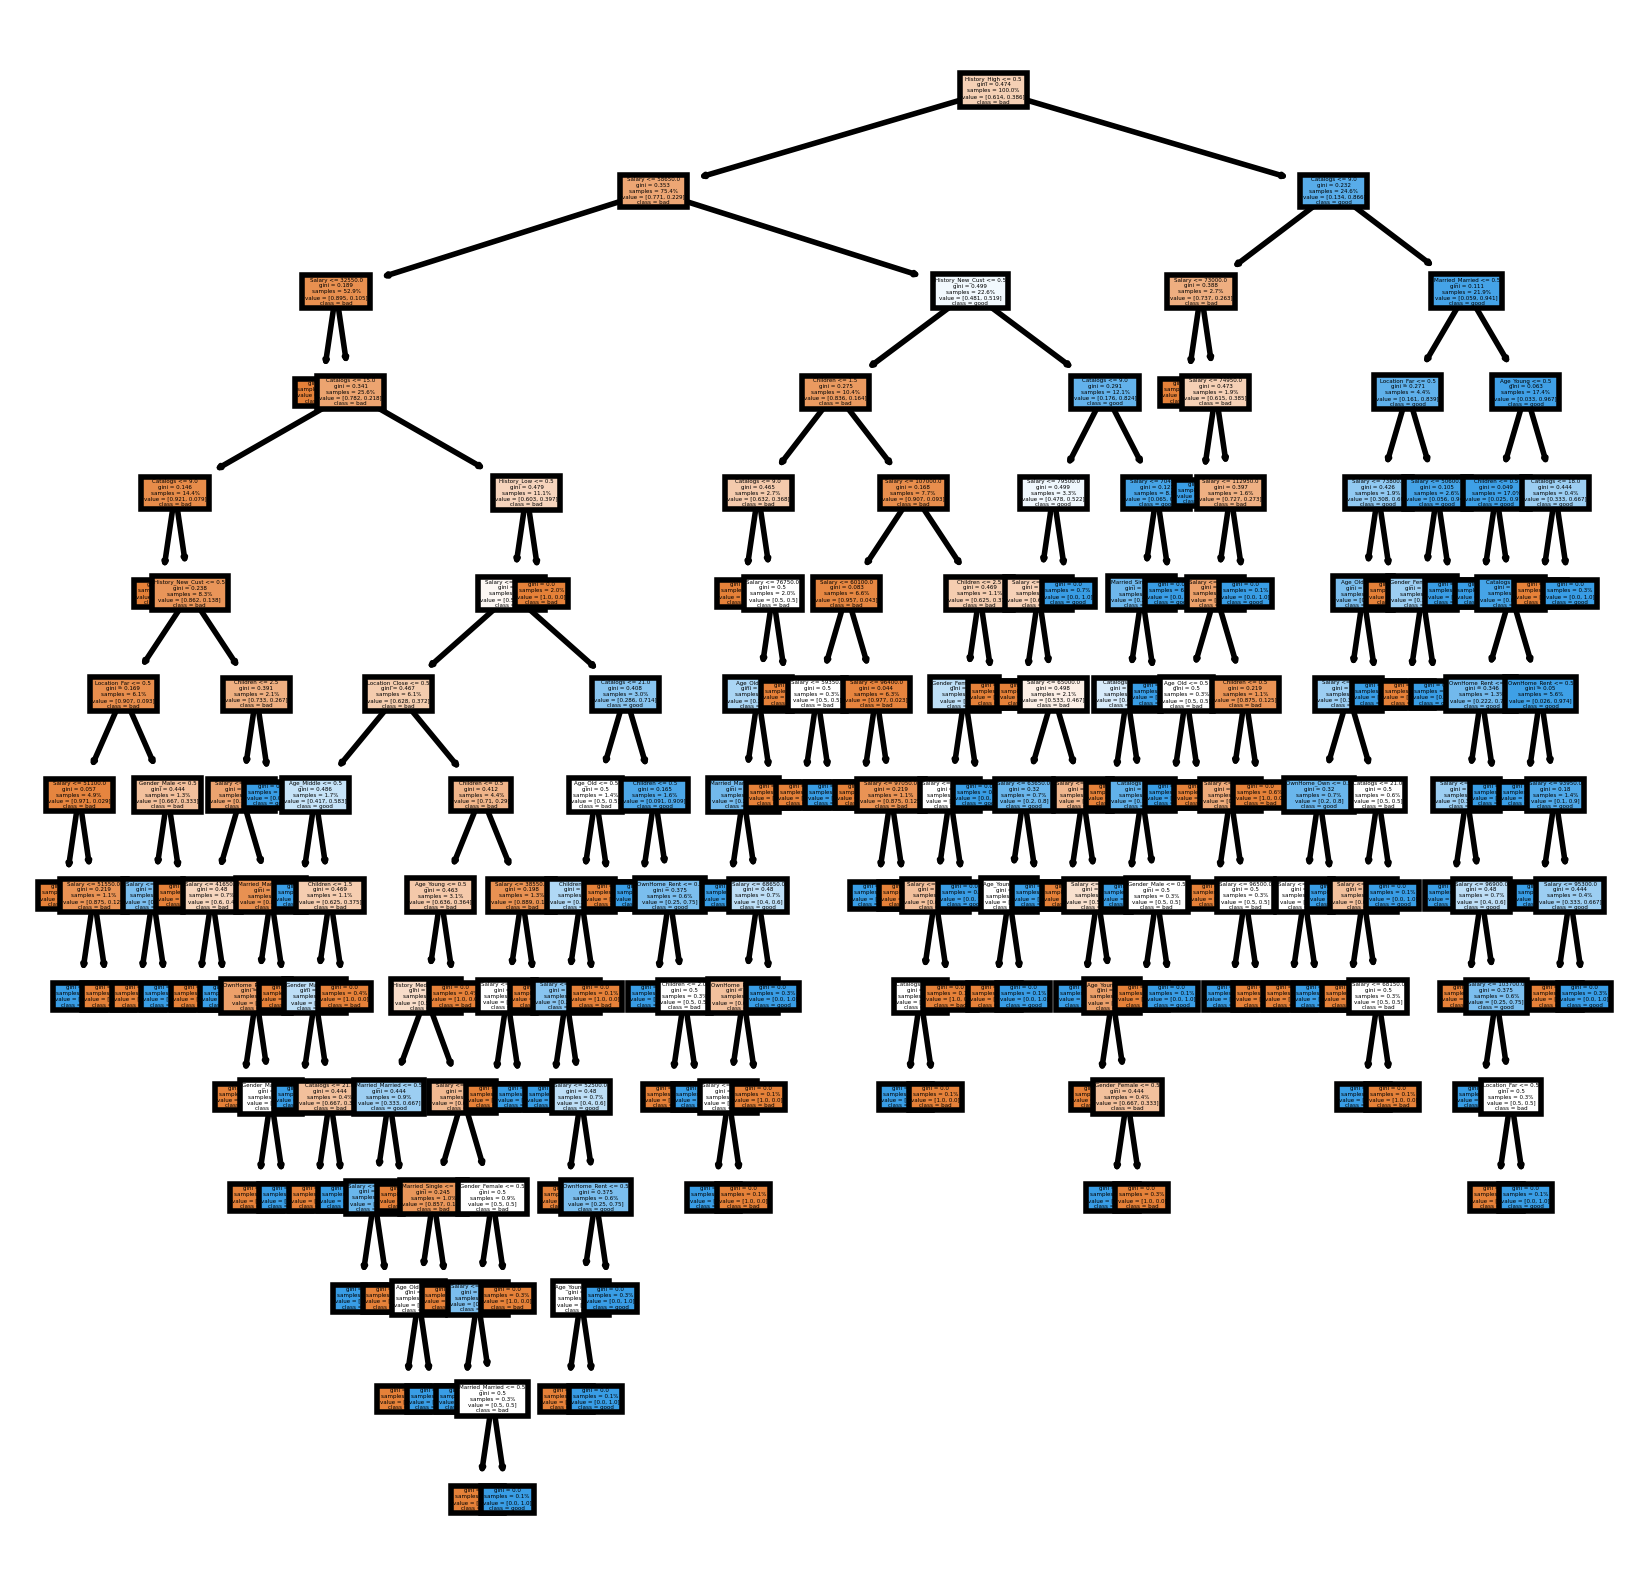

In [50]:
plt.figure(figsize=(5,5), dpi = 400)
tree.plot_tree(mod1, feature_names = X_train.columns.to_list(),
              class_names = ["bad","good"],
              filled=True, proportion = True)
plt.show()

In [51]:
X_test.head(2)

,Salary,Children,Catalogs,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium,History_New_Cust
1,63600,0,6,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0
4,68400,0,12,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0


In [52]:
X_test.shape

(300, 18)

In [53]:
preds = mod1.predict(X_test)

In [54]:
actual = y_test.values

In [55]:
#np.array([False, True, False]).sum()

In [56]:
((actual == preds).sum())/300

0.8666666666666667

In [57]:
import sklearn.metrics as metrics

In [66]:
metrics.confusion_matrix(actual,preds)

array([[155,  16],
       [ 24, 105]], dtype=int64)

In [67]:
y_train_pred = mod1.predict(X_train)
print("Training accuracy(in %):", metrics.accuracy_score(y_train, y_train_pred)*100)

Training accuracy(in %): 100.0


In [68]:
y_pred = mod1.predict(X_test)
accuracy = metrics.accuracy_score(y_pred,y_test)
print('Testing Accuracy:',accuracy)

Testing Accuracy: 0.8666666666666667


In [28]:
cols = list(X_train.columns.values)
cols

['Salary',
 'Children',
 'Catalogs',
 'Age_Middle',
 'Age_Old',
 'Age_Young',
 'Gender_Female',
 'Gender_Male',
 'OwnHome_Own',
 'OwnHome_Rent',
 'Married_Married',
 'Married_Single',
 'Location_Close',
 'Location_Far',
 'History_High',
 'History_Low',
 'History_Medium',
 'History_New_Cust']

In [59]:
tree_rules = tree.export_text(mod1,  feature_names = cols)
print(tree_rules)

|--- History_High <= 0.50
|   |--- Salary <= 58650.00
|   |   |--- Salary <= 32550.00
|   |   |   |--- class: 0
|   |   |--- Salary >  32550.00
|   |   |   |--- Catalogs <= 15.00
|   |   |   |   |--- Catalogs <= 9.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Catalogs >  9.00
|   |   |   |   |   |--- History_New_Cust <= 0.50
|   |   |   |   |   |   |--- Location_Far <= 0.50
|   |   |   |   |   |   |   |--- Salary <= 51100.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Salary >  51100.00
|   |   |   |   |   |   |   |   |--- Salary <= 51550.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Salary >  51550.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Location_Far >  0.50
|   |   |   |   |   |   |   |--- Gender_Male <= 0.50
|   |   |   |   |   |   |   |   |--- Salary <= 36850.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Sal

### Identifying Important features of the model

In [44]:
feat_imp = mod1.feature_importances_
print(feat_imp)

[0.23501118 0.         0.0762964  0.         0.         0.
 0.         0.         0.         0.         0.00400833 0.
 0.         0.         0.51713117 0.         0.         0.16755292]


In [34]:
feat_imp = mod1.feature_importances_
pd.Series(feat_imp,index=cols).sort_values(ascending=False)

History_High        0.517131
Salary              0.235011
History_New_Cust    0.167553
Catalogs            0.076296
Married_Married     0.004008
History_Low         0.000000
Location_Far        0.000000
Location_Close      0.000000
Married_Single      0.000000
OwnHome_Rent        0.000000
History_Medium      0.000000
Gender_Male         0.000000
Gender_Female       0.000000
Age_Young           0.000000
Age_Old             0.000000
Age_Middle          0.000000
Children            0.000000
OwnHome_Own         0.000000
dtype: float64

## Drawing ROC Curve and computing AUC

In [45]:
probs = mod1.predict_proba(X_test)
probs

array([[1.        , 0.        ],
       [0.16129032, 0.83870968],
       [0.03278689, 0.96721311],
       [0.03278689, 0.96721311],
       [1.        , 0.        ],
       [0.78212291, 0.21787709],
       [0.03278689, 0.96721311],
       [0.17647059, 0.82352941],
       [0.16129032, 0.83870968],
       [1.        , 0.        ],
       [0.83561644, 0.16438356],
       [0.17647059, 0.82352941],
       [0.17647059, 0.82352941],
       [0.78212291, 0.21787709],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.03278689, 0.96721311],
       [0.78212291, 0.21787709],
       [0.78212291, 0.21787709],
       [1.        , 0.        ],
       [0.03278689, 0.96721311],
       [1.        , 0.        ],
       [0.03278689, 0.96721311],
       [0.03278689, 0.96721311],
       [0.16129032, 0.83870968],
       [0.03278689, 0.96721311],
       [0.17647059, 0.82352941],
       [0.03278689, 0.96721311],
       [0.16129032, 0.83870968],
       [0.17647059, 0.82352941],
       [0.

In [31]:
prob_positive = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print('Area under the curve:',roc_auc)

Area under the curve: 0.9293938981821479


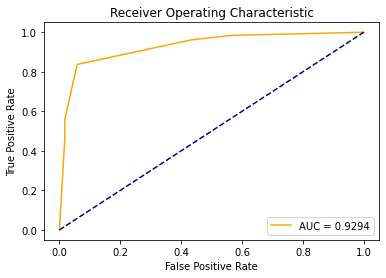

In [46]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Pruning


In [60]:

clf = tree.DecisionTreeClassifier(criterion = "gini", max_leaf_nodes =5, min_samples_leaf = 4, 
                             max_depth=3)   
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5, min_samples_leaf=4)

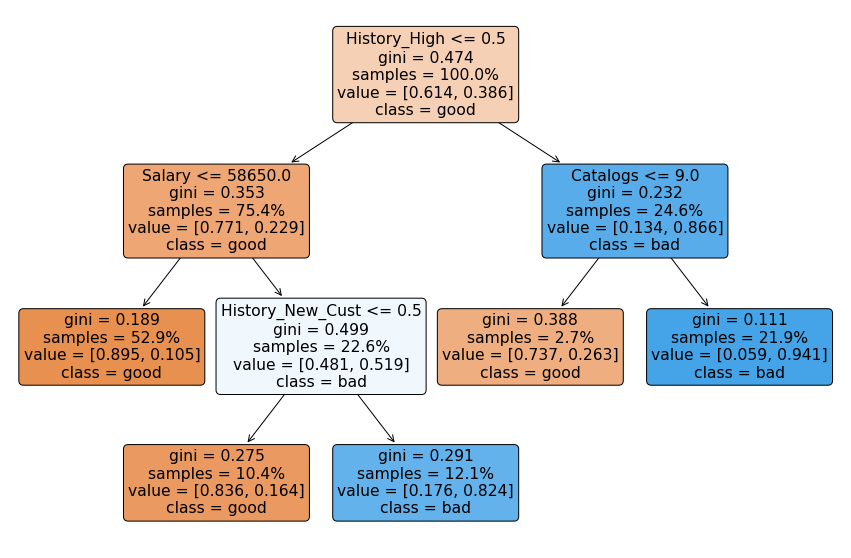

In [61]:
plt.figure(figsize=(15,10))

tree.plot_tree(clf,feature_names=cols, filled=True, 
               precision=3,proportion=True,rounded=True, class_names=["good","bad"]) 
plt.show()

In [62]:
y_train_pred = clf.predict(X_train)
print("Training accuracy(in %):", metrics.accuracy_score(y_train, y_train_pred)*100)

Training accuracy(in %): 88.57142857142857


In [63]:
y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_pred,y_test)
print('Testing Accuracy:',accuracy)

Testing Accuracy: 0.8833333333333333


### GridSearch Algorithm for choosing best parameters (Hyperparameter Selection)

In [39]:
from sklearn.model_selection import GridSearchCV
mod=GridSearchCV(clf,param_grid={'max_depth':[i for i in range(2,10)], 
                                 'max_leaf_nodes':[i for i in range(3,20)],
                                 'min_samples_leaf':[i for i in range(5,100,5)]
                                })
mod.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=4, max_leaf_nodes=8,
                                              min_samples_leaf=4),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'max_leaf_nodes': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                            14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 30, 35, 40, 45,
                                              50, 55, 60, 65, 70, 75, 80, 85,
                                              90, 95]})

In [40]:
mod.best_estimator_

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6, min_samples_leaf=10)

In [41]:
mod.best_score_

0.8699999999999999

In [69]:
y_test_pred = mod.predict(X_test)
print("Testing accuracy(in %):", metrics.accuracy_score(y_test, y_test_pred)*100)

Testing accuracy(in %): 88.33333333333333
